In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Mac OS 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [19]:
file_path = "Mall_Customers.csv"
df = pd.read_csv(file_path)

In [20]:
# 데이터 정보 확인
df_info = df.info()
df_head = df.head()

df.shape, df.columns, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


((200, 5),
 Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
        'Spending Score (1-100)'],
       dtype='object'),
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                  15                      39
 1           2    Male   21                  15                      81
 2           3  Female   20                  16                       6
 3           4  Female   23                  16                      77
 4           5  Female   31                  17                      40)

In [21]:
# 열 이름 괄호 제거
df.rename(columns={
    'Annual Income (k$)': 'Annual Income',
    'Spending Score (1-100)': 'Spending Score'
}, inplace=True)

In [22]:
df.head(4)

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [23]:
# 결측값 확인
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [24]:
# 기본 통계
print(df.describe())

       CustomerID         Age  Annual Income  Spending Score
count  200.000000  200.000000     200.000000      200.000000
mean   100.500000   38.850000      60.560000       50.200000
std     57.879185   13.969007      26.264721       25.823522
min      1.000000   18.000000      15.000000        1.000000
25%     50.750000   28.750000      41.500000       34.750000
50%    100.500000   36.000000      61.500000       50.000000
75%    150.250000   49.000000      78.000000       73.000000
max    200.000000   70.000000     137.000000       99.000000


In [25]:
# 성별 분포
print(df['Gender'].value_counts())

Gender
Female    112
Male       88
Name: count, dtype: int64


In [26]:
# 성별에 따른 평균 소비 점수
print(df.groupby('Gender')['Spending Score'].mean())

Gender
Female    51.526786
Male      48.511364
Name: Spending Score, dtype: float64


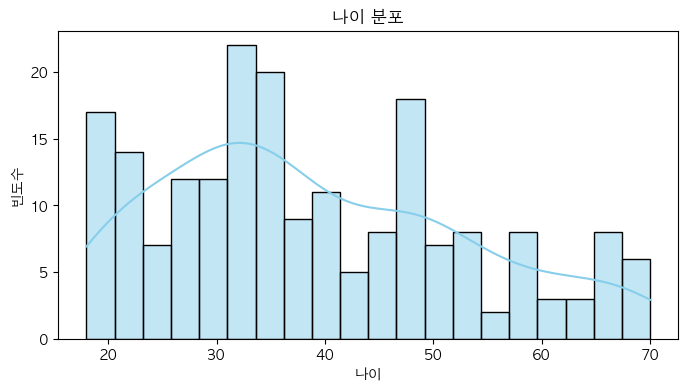

In [27]:
# 나이 분포 히스토그램
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('나이 분포')
plt.xlabel('나이')
plt.ylabel('빈도수')
plt.show()

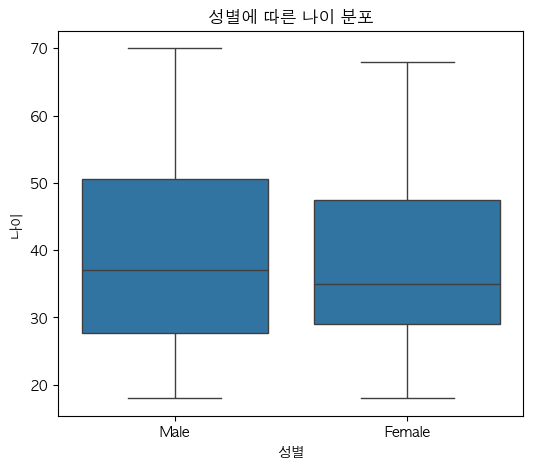

In [28]:
# 성별에 따른 나이 분포
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Gender', y='Age')
plt.title('성별에 따른 나이 분포')
plt.xlabel('성별')
plt.ylabel('나이')
plt.show()

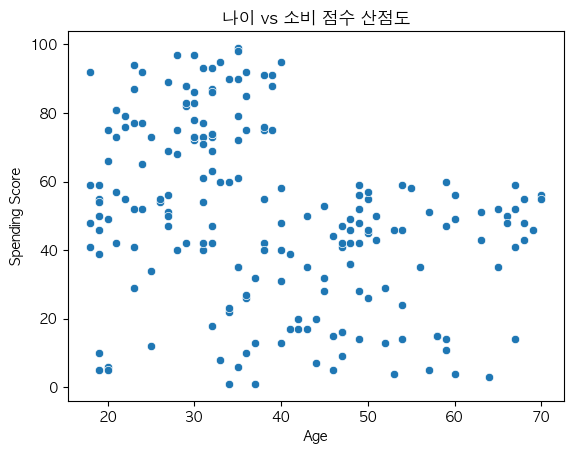

In [29]:
# 나이와 소비 점수 간의 관계
sns.scatterplot(data=df, x='Age', y='Spending Score')
plt.title("나이 vs 소비 점수 산점도")
plt.show()

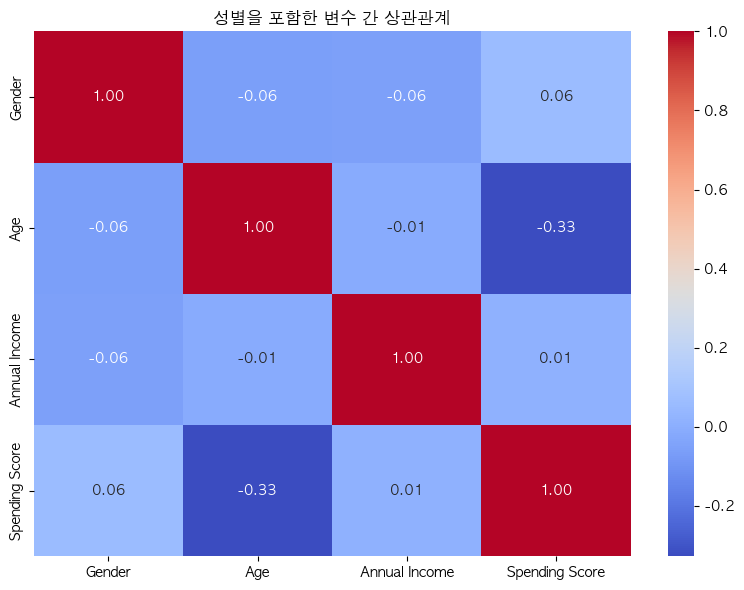

In [30]:
# 성별을 0과 1로 변환 (Male: 0, Female: 1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# 상관계수 계산 (Customer ID 제외)
correlation_with_gender = df.drop(columns='CustomerID').corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_gender, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("성별을 포함한 변수 간 상관관계")
plt.tight_layout()
plt.show()


Age/Spending Score: 나이가 많아 질수록 소비 점수가 낮아짐(-0.33)